In [5]:
import os
import sys
import pathlib

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray
from utils.processImage import get_subimage, process_image, plot_subimages, stitch_subimages
from utils.solver import sudoku, solve_sudoku, plot_sudoku
import cv2 as cv

TEST_IMAGES = pathlib.Path.cwd().parent.joinpath("test_images")

## Solving a Sudoku given a numpy array

In [6]:
input_array = np.array(
[[2, 0, 6, 5, 0, 0, 4, 1, 9],
 [9, 0, 5, 0, 0, 2, 0, 0, 8],
 [0, 0, 0, 3, 9, 4, 6, 0, 5],
 [0, 5, 7, 4, 0, 0, 0, 6, 0],
 [0, 1, 0, 9, 0, 8, 0, 4, 0],
 [4, 0, 0, 0, 5, 0, 3, 8, 0],
 [1, 7, 4, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 6, 7, 9, 0, 0, 0],
 [0, 0, 9, 0, 4, 1, 8, 0, 3]])

s = sudoku(input_array)
s

[[2 0 6 5 0 0 4 1 9]
 [9 0 5 0 0 2 0 0 8]
 [0 0 0 3 9 4 6 0 5]
 [0 5 7 4 0 0 0 6 0]
 [0 1 0 9 0 8 0 4 0]
 [4 0 0 0 5 0 3 8 0]
 [1 7 4 0 0 0 0 0 0]
 [0 0 0 6 7 9 0 0 0]
 [0 0 9 0 4 1 8 0 3]]

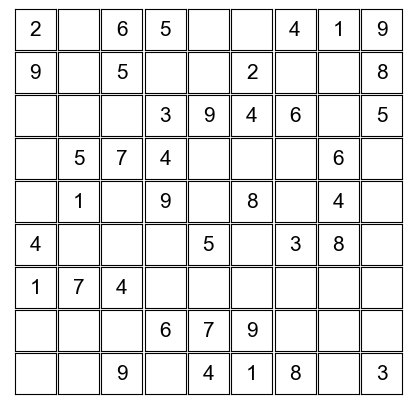

In [7]:
plot_sudoku(s)

solved in 5 turns


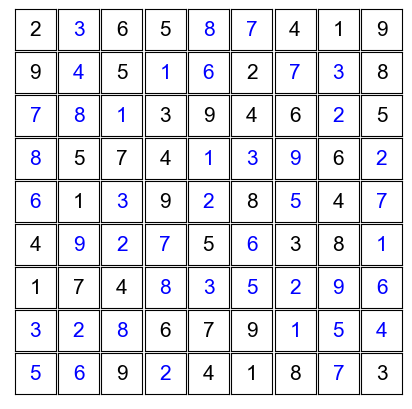

In [8]:
solve_sudoku(s)

##  Reading the Sudoku from a good quality top-down image of a Sudoku

In [9]:
fp=TEST_IMAGES.joinpath("sudoku_test.png")

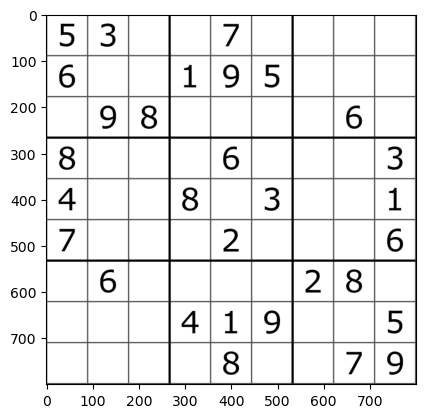

In [10]:
image = imread(fp)
image = rgb2gray(image[:,:,:3])

image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

plt.imshow(image, cmap='gray')
plt.show()

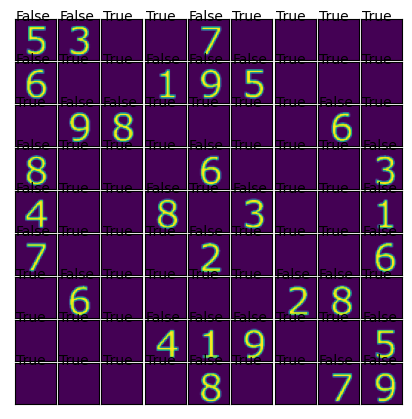

In [11]:
plot_subimages(image)

In [12]:
# from skimage import transform
# transformed_image = transform.resize(image,(540,540),anti_aliasing=False)
# stitched, x = stitch_subimages(transformed_image)
# fig, ax = plt.subplots(figsize=(10,1))
# _i=ax.imshow(1-stitched, cmap='gray')
# plt.axis('off')
# plt.savefig(TEST_IMAGES.joinpath("stitched.jpg"))
# plt.show()

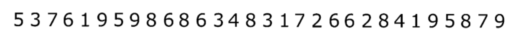

537619598686 348317 266 284 195879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

In [13]:
s=process_image(fp)
s

solved in 10 turns


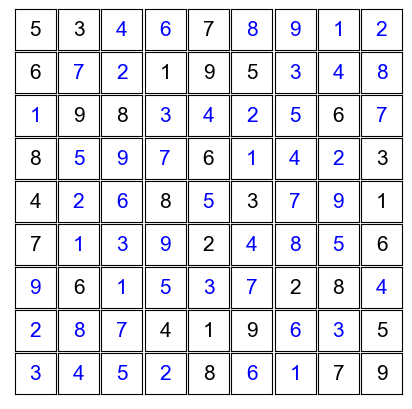

In [14]:
solve_sudoku(s)

## Example 2: From unwarped image



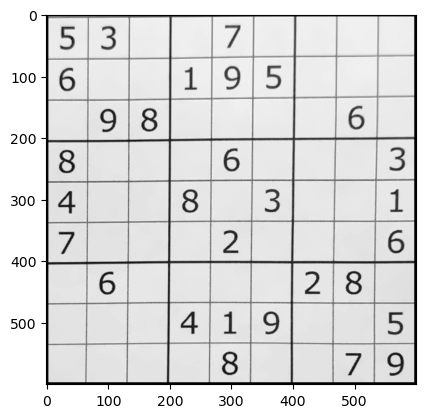

In [15]:
fp=TEST_IMAGES.joinpath("sudoku_wiki_unwarped.png")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()


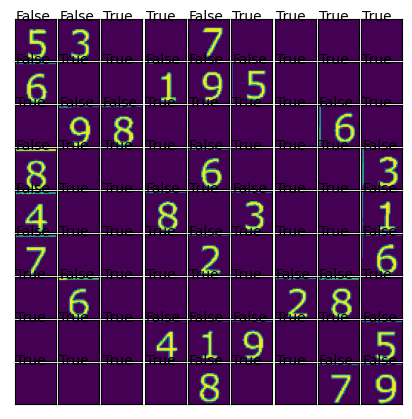

In [16]:
plot_subimages(image)

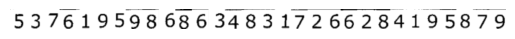

53 76 19598 686 34 83 17 2 66 284195879
537619598686348317266284195879


[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]

In [17]:
s=process_image(fp)
s

solved in 10 turns


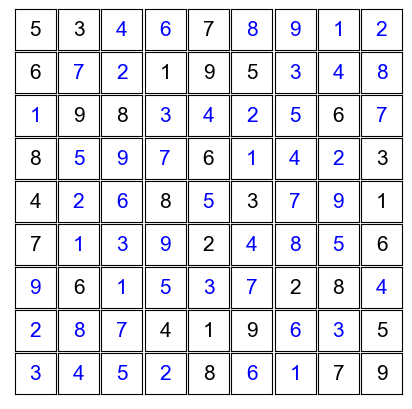

In [18]:
solve_sudoku(s)

## NYT sudoku (easy)

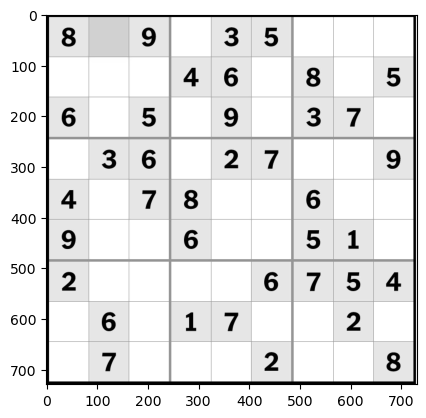

In [19]:
fp=TEST_IMAGES.joinpath("sudoku_nyt_easy.jpg")

image = imread(fp)
image = rgb2gray(image[:,:,:3])
image = cv.fastNlMeansDenoising(np.uint8(image*255.0))
# image = (image - image.min())/(image.max()-image.min())

fig, ax = plt.subplots()
ax.imshow(image, 'gray')
plt.show()

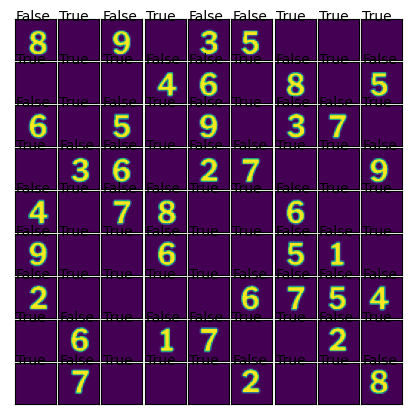

In [20]:
plot_subimages(image)

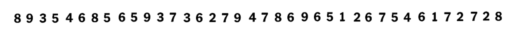

8935 4 6 85 65 9 37 36 279 47 86 9651 26 754 6172 728
89354685659373627947869651267546172728


[[8 0 9 0 3 5 0 0 0]
 [0 0 0 4 6 0 8 0 5]
 [6 0 5 0 9 0 3 7 0]
 [0 3 6 0 2 7 0 0 9]
 [4 0 7 8 0 0 6 0 0]
 [9 0 0 6 0 0 5 1 0]
 [2 0 0 0 0 6 7 5 4]
 [0 6 0 1 7 0 0 2 0]
 [0 7 0 0 0 2 0 0 8]]

In [21]:
s=process_image(fp)
s

solved in 5 turns


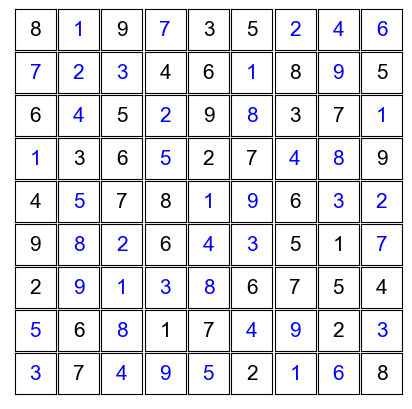

In [22]:
solve_sudoku(s)